In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [10]:
# this is still without poiss_atac space, update the path!
adata = sc.read_h5ad("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_with_poiss_VI.h5ad")

In [11]:
adata.obs['time'] = adata.obs.apply(lambda x: 0 if x["sample"]=="E14-5" else 1, axis=1)

In [6]:
adata

AnnData object with n_obs × n_vars = 16978 × 164082
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'doublet_calls', 'final_doublets', 'final_doublets_cat', 'nCount_peaks', 'nFeature_peaks', 'nCount_SCT', 'nFeature_SCT', 'SCT.weight', 'peaks.weight', 'sample', 'ident', 'old_index', 'celltype', 'batch', '_scvi_batch', '_scvi_labels', 'time'
    var: 'count', 'percentile', 'n_cells'
    uns: 'X_name', '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'neighbors', 'sample_colors', 'umap'
    obsm: 'LSI', 'UMAP.ATAC', 'X_poiss_vi', 'poiss_vi_umap'
    layers: 'ATAC_counts', 'logcounts'
    obsp: 'connectivities', 'distances'

# PCA on ATAC space

In [12]:
sc.pp.pca(adata, n_comps=50)

In [14]:
# this takes a while because PCA is computed internally
tp0 = TemporalProblem(adata)
#tp0.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse")
tp0 = tp0.prepare("time", joint_attr="X_pca")

In [15]:
tp0 = tp0.solve(epsilon=5e-2, scale_cost="mean", tau_a=0.95, tau_b=0.99, max_iterations=1e5)

In [16]:
ct_desc = tp0.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=True)

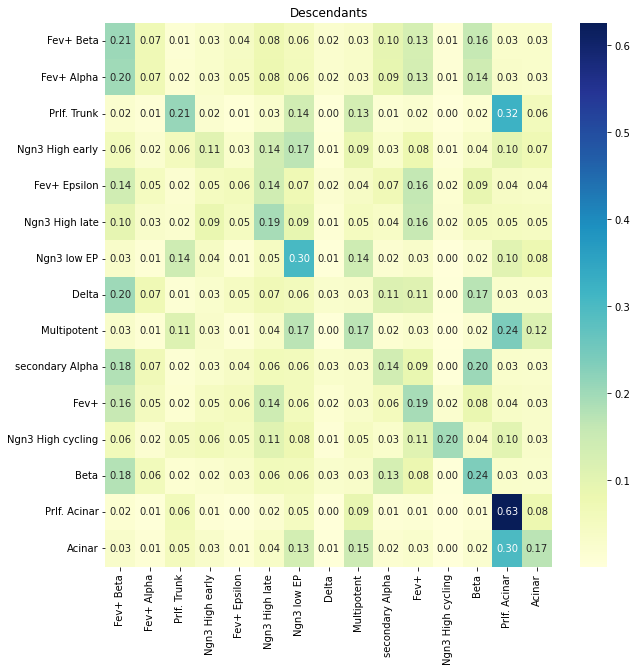

In [17]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_desc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Descendants")
plt.show()

In [18]:
ct_anc = tp0.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=False)

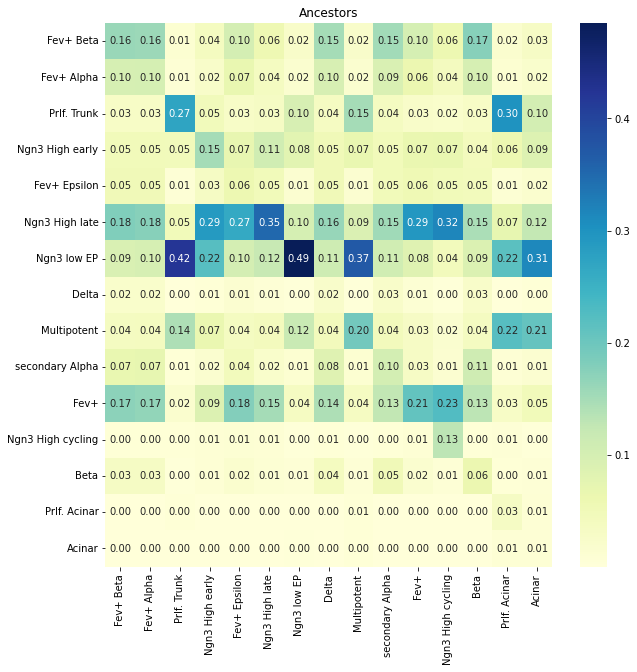

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_anc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Ancestors")
plt.show()

# scVI on ATAC space

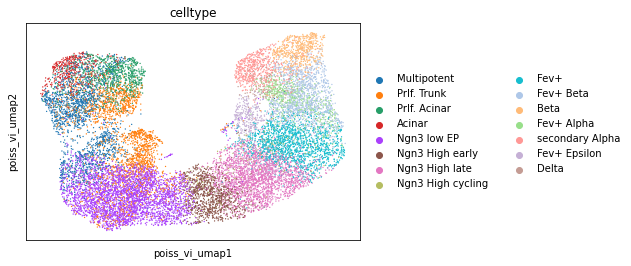

In [22]:
sc.pl.embedding(adata, basis="poiss_vi_umap", color="celltype")

In [24]:
tp1 = TemporalProblem(adata)
tp1 = tp1.prepare("time", joint_attr="X_poiss_vi")

In [25]:
tp1 = tp1.solve(epsilon=5e-2, scale_cost="mean", tau_a=0.95, tau_b=0.99)

In [26]:
ct_desc = tp1.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=True)

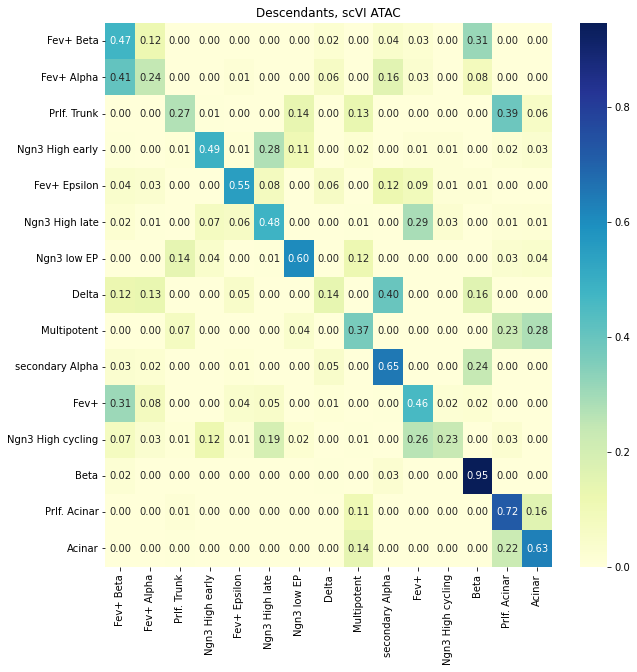

In [28]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_desc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Descendants, scVI ATAC")
plt.show()

In [29]:
ct_anc = tp1.cell_transition(early_cells="celltype", late_cells="celltype", start=0, end=1, forward=False)

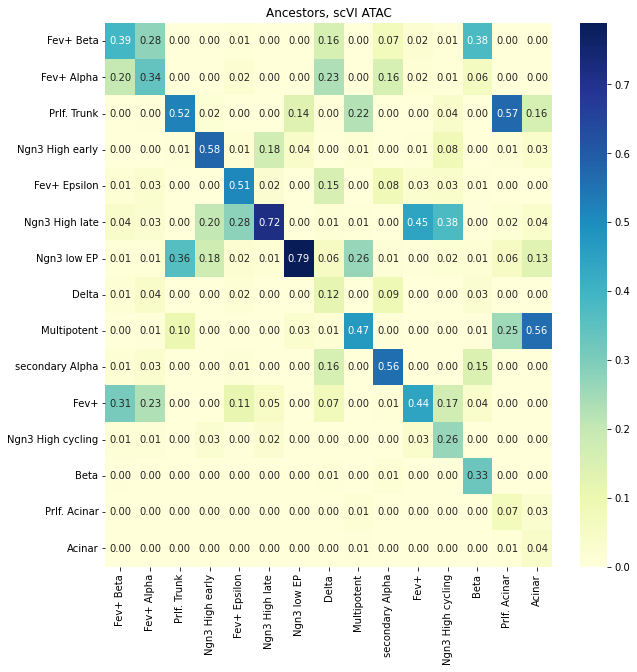

In [30]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(ct_anc, annot=True, cmap="YlGnBu", ax=ax, fmt=".2f", annot_kws={"fontsize": 10})
plt.title("Ancestors, scVI ATAC")
plt.show()